[[0.21493497 0.20817244 0.21665593 0.21336387]
 [0.21370728 0.20799462 0.21686327 0.21192436]
 [0.21226894 0.20710749 0.21592664 0.21106285]
 ...
 [0.88529081 0.88728092 0.88690927 0.88739368]
 [0.88861713 0.89468975 0.89211985 0.89236338]
 [0.89693805 0.90856572 0.90398834 0.90831329]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 63, 55)            13200     
_________________________________________________________________
dropout (Dropout)            (None, 63, 55)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 63, 55)            24420     
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 55)            0         
_________________________________________________________________
lstm_2 (LSTM)                (No

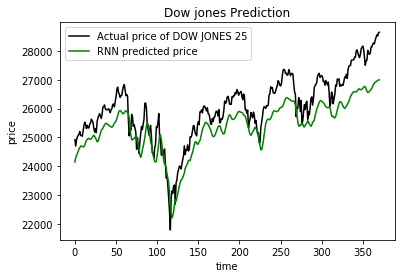

In [3]:
# RNN ai module for predicting djia
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# importing training set
# lets get it
from tensorflow import keras
from tensorflow_core.python.keras.layers.recurrent import LSTM
from tensorflow_core.python.keras.models import Sequential
from tensorflow_core.python.layers.core import Dropout, Dense

dow_data = pd.read_csv('dow.csv')
# 1:2 makes range and 2 is excluded so just 1 ;) meaning open to make it a np array
training_set = dow_data.iloc[:, 1:5].values
# print(training_set)
# feature scaling (normalisation/standardisation
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
# apply sc on data
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)
# print(training_set_scaled.shape)
# so now all data is between 0 and 1
# print(len(training_set_scaled))
# 63 stock timesteps to predict next one 1
X_train = []
X_train2 = []
X_train3 = []
X_train4 = []
Y_train = []
for i in range(63, 3405):
    # to get last 63 u just give it a range and //////something something ?pick 64 cause topline is excluded
    X_train.append(training_set_scaled[i - 63:i, 0])
    X_train2.append(training_set_scaled[i - 63:i, 1])
    X_train3.append(training_set_scaled[i - 63:i, 2])
    X_train4.append(training_set_scaled[i - 63:i, 3])
    Y_train.append(training_set_scaled[i, 3])
# currentyl these bitches are lists
# so make them into numpy so our rnn can read it
X_train, X_train2, X_train3, X_train4, Y_train = np.array(X_train), np.array(X_train2), np.array(X_train3), np.array(
    X_train4), np.array(Y_train)
'''
print('X-train-1')
print(X_train)
print('X-train-2')
print(X_train2)
print('X-train-3')
print(X_train3)
print('X-train-4')
print(X_train4)
'''
X_train = np.dstack((X_train, X_train2))
X_train3 = np.dstack((X_train3, X_train4))
X_train = np.dstack((X_train, X_train3))
# Reshaping data to add extra dimensions to add more indicators!!!!!!!!!!!!!!!!
# so only xtrain needs the reshape
# currently 2 dimesnisons with 63 X 3,4k
# adding a 3rd dimenmsion ;)
#
# shape 0 and 1 mean 3,4k-63 and 63 aaaaaaand last is number of indicators
# print(X_train.shape)
# print(X_train.shape[0])
# print(X_train.shape[1])
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#print(X_train.shape)
#print("xtrain shape")
#print("And Ytrain shape ")
#print(Y_train.shape)


from tensorflow.keras.models import *
from tensorflow.keras.layers import *
'''
# regression is for predicting continumum data hence forth the name
regressor = Sequential()
# Return sequences true when stacking false when no more
# input shape only needs last 2 dimensions
regressor.add(LSTM(units=55, return_sequences=True, input_shape=(X_train.shape[1], 4)))
regressor.add(Dropout(0.2))
#
regressor.add(LSTM(units=55, return_sequences=True))
regressor.add(Dropout(0.2))
#
regressor.add(LSTM(units=55, return_sequences=True))
regressor.add(Dropout(0.2))
#
regressor.add(LSTM(units=55, return_sequences=False))
regressor.add(Dropout(0.2))
# output layer
regressor.add(Dense(units=1))
# we could use RMSprop , adam is super solid but im cocky and using some random dudes improv Nadam N+adam :D
regressor.compile(optimizer="adam", loss="mean_squared_error")
regressor.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=1)

regressor.save("dow_multi_model.h5")  # name it whatever you want but end with .h5
#
'''
regressor = keras.models.load_model("dow_multi_model.h5")
regressor.summary()

# getting test data into here babyyyy
# dow_all_data_with_test = pd.read_csv("full_dow.csv")
dow_test_data = pd.read_csv("dow_test.csv")
dow_real_prices = dow_test_data.iloc[:,4:5].values
# dow_real_prices = dow_all_data_with_test.iloc[:, 4:5].values  # for plotting  close prices

dataset_total = pd.concat((dow_data[['Open','High','Low','Close']], dow_test_data[['Open','High','Low','Close']]), axis = 0)
all_dow_close_prices = pd.concat((dow_data['Close'], dow_test_data['Close']), axis = 0)

# getting predicted data!
# over here leeets gooo :)))))
# dataset_total = pd.concat((dow_data, dow_test_data), axis = 0)

# 371 gettling test starting day!!!!!!!!!!!!!!!!!! len1-len2 and : gives upper bound as last apparently
inputs = dataset_total[len(dataset_total) - len(dow_test_data) - 63:].values
inputs = np.array(inputs)
# now we havent shaped this data the right way jsut yet so lets  reshape with reshape
inputs = inputs.reshape(-1,4)

# print(close_prices)
# print(close_prices.shape)
# print(inputs.shape)


# now rnn expects a 3d format in this case so lets make it
# before we do that scale them now
# because it was trained on scaled data so it expects them too
# doing it here cause we need to keep the test data;) as it is in the begining
# # here we have a bit of a pickle
# sc_test = MinMaxScaler()
inputs = sc.transform(inputs)
# print("inputs scaled")
# print(inputs)
# dow_real_prices = sc_test.fit_transform(dow_real_prices)
# print("just closing prices scaled")
# print(dow_real_prices)

# incoming 3d structure
X_test = []
X_test2 = []
X_test3 = []
X_test4 = []

for i in range(63, 434):
    # to get last 63 u just give it a range and //////something something ?pick 64 cause topline is excluded
    X_test.append(inputs[i - 63:i, 0])
    X_test2.append(inputs[i - 63:i, 1])
    X_test3.append(inputs[i - 63:i, 2])
    X_test4.append(inputs[i - 63:i, 3])

X_test, X_test2, X_test3, X_test4 = np.array(X_test), np.array(X_test2), np.array(X_test3), np.array(X_test4)
X_test = np.dstack((X_test, X_test2))
X_test3 = np.dstack((X_test3, X_test4))
X_test = np.dstack((X_test, X_test3))
# print(X_test.shape)
# print(X_test)
# 3d structure



# getting results baby
predictions = regressor.predict(X_test)
print(predictions.shape)

predictions = np.concatenate((predictions, predictions), 1)
predictions = np.concatenate((predictions, predictions), 1)
print(predictions.shape)
print(predictions)
# inverse the scaled values to understand what in the hell is going on lol
predictions = sc.inverse_transform(predictions)
predictions = np.delete(predictions,np.s_[1:4], axis=1)
print(predictions.shape)

# V             A               I
#   I       U       L       S       N
#       S               I               G
plt.plot(dow_real_prices, color="black", label="Actual price of DOW JONES 25")
plt.plot(predictions, color="green", label="RNN predicted price")
plt.title("Dow jones Prediction")
plt.xlabel('time')
plt.ylabel('price')
plt.legend()

plt.show()